## Design Summary

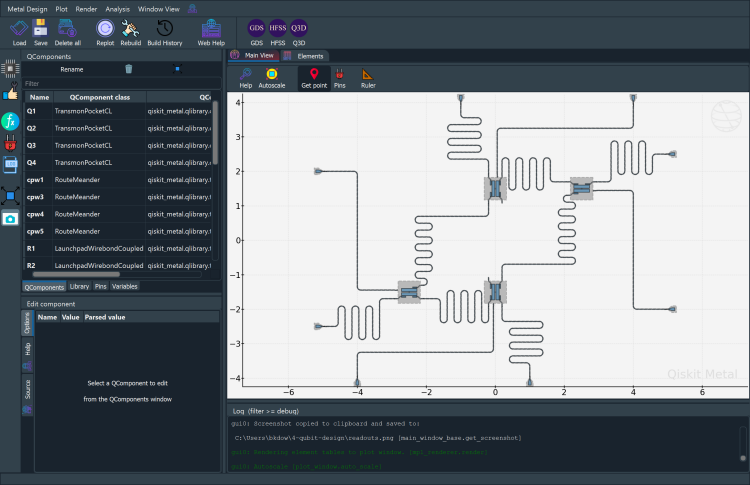


Target frequencies are summarized below. Frequency spacings are set to be as large as possible within the given constraint on the available electronnics to minimize the crosstalk. Target readout frequencies are calculated from the set qubit frequencies with the formula $\chi\approx-\frac{g^2 E_c}{\Delta (\Delta-Ec)}$. Substituting the target values given in the problem yields a quadratic equation on the detuning $\Delta = \omega_q-\omega_r$, which gives the solution of $\Delta = -1.8$ or $1.5$.

### Target Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25|5.42|5.58|5.75|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|7.05|7.22|7.38|7.55|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|8.00|8.40|8.80|9.20|

### Achieved Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25984|5.486713|5.557822|5.75221|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|6.7134|7.10829|7.38|7.78023|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|7.78023|8.69631|8.767001|9.16086|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [5]:
gui = MetalGUI(design)

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

connection23_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [8]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [9]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='330um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))

options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [10]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

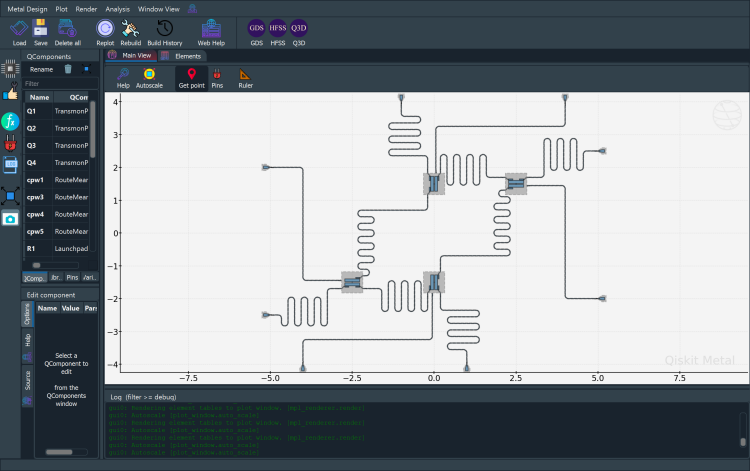

In [11]:
gui.autoscale()
gui.screenshot(name="full_design")

In [12]:
import numpy as np
from scipy.constants import c, h, pi, hbar, e
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength

# constants:
phi0    = h/(2*e)
varphi0 = phi0/(2*pi)

# project target parameters
f_qList = np.around(np.linspace(5.25, 5.75, 4),2) # GHz
f_rList = f_qList + 1.8 # GHz
L_JJList = np.around(varphi0**2/((f_qList*1e9+300e6)**2/(8*300e6))/h*1e9, 2) # nH

# initial CPW readout lengths
def find_resonator_length(frequency, line_width, line_gap, N): 
    #frequency in GHz
    #line_width/line_gap in um
    #N -> 2 for lambda/2, 4 for lambda/4
    
    [lambdaG, etfSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    return str(lambdaG/N*10**3)+" mm"

find_resonator_length(f_rList, 10, 6, 2)

'[8.63311117 8.42983847 8.24707774 8.06138195] mm'

In [13]:
find_resonator_length(np.around(np.linspace(8, 9.2, 4), 2), 10, 6, 2)

'[7.60792921 7.24564687 6.91629928 6.61559061] mm'

In [33]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '550um' # 405
transmons[0].options.pad_height = '120um'

transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '500um' # 405
transmons[1].options.pad_height = '120um'

transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '370um' # 405
transmons[2].options.pad_height = '120um'
transmons[2].options.connection_pads.d.pad_gap='10um'
transmons[2].options.connection_pads.a.pad_gap='10um'
transmons[2].options.connection_pads.c.pad_gap='10um'

transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '440um' # 405
transmons[3].options.pad_height = '120um'

readout_lines[0].options.total_length = '8.63mm'
readout_lines[1].options.total_length = '8.42mm'
readout_lines[2].options.total_length = '8.24mm'
readout_lines[3].options.total_length = '8.06mm'

cpw[0].options.total_length = '7mm'
cpw[1].options.total_length = '7mm'
cpw[2].options.total_length = '7mm'
cpw[3].options.total_length = '7mm'

gui.rebuild()
gui.autoscale()

qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
qcomps['Q3'].options['hfss_inductance'] = 'Lj3'
qcomps['Q3'].options['hfss_capacitance'] = 'Cj3'
qcomps['Q4'].options['hfss_inductance'] = 'Lj4'
qcomps['Q4'].options['hfss_capacitance'] = 'Cj4'

### Q3D Analysis

In [34]:
from qiskit_metal.analyses.quantization import EPRanalysis, LOManalysis

In [35]:
from qiskit_metal.analyses.quantization.lumped_capacitive import load_q3d_capacitance_matrix
from qiskit_metal.analyses.quantization.lom_core_analysis import CompositeSystem, Cell, Subsystem, QuantumSystemRegistry
                        

In [37]:
c1 = LOManalysis(design, "q3d")
q3d1 = c1.sim.renderer
q3d1.start()

q3d1.activate_ansys_design("Q3only_busopen_370_gap_reduced", 'capacitive')
q3d1.render_design(['Q3', 'R3', 'cpw3', 'cpw4', 'ol3', 'line_cl3', 'CL3'], [('cpw3', 'start'),('cpw4', 'end')])

q3d1.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05)
q3d1.analyze_setup("Setup")
c1.sim.capacitance_matrix, c1.sim.units = q3d1.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d1.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 01:06PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:06PM [load_ansys_project]: 	Opened Ansys App
INFO 01:06PM [load_ansys_project]: 	Opened Ansys Desktop v2018.0.0
INFO 01:06PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //Mac/Home/Documents/Ansoft/
	Project:   Project19
INFO 01:06PM [connect_design]: 	Opened active design
	Design:    Q3only_busopen_370 [Solution type: Q3D]
INFO 01:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:06PM [connect]: 	Connected to project "Project19" and design "Q3only_busopen_370" 😀 

01:06PM 49s WARNING [activate_ansys_design]: The design_name=Q3only_busopen_370_gap_reduced was not in active project.  Designs in active project are: 
['Q1only_busopen', 'Q3only_busopen', 'Q3only_busopen_440', 'Q3only_busopen_400', 'Q3only_busopen_410', 'Q3only_busopen_380', 'Q3only_busopen_370', 'Q3only_busopen_420'].  A new design will be added to the project.  
INFO 01:06PM [connect_design]: 	Opened 

,a_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,launch_pad_CL3,launch_pad_R3,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,1192.000000,-0.546040,-0.020283,-0.148400,-1173.100,-0.000364,-0.000953,-15.786000,-1.283400
c_connector_pad_Q3,-0.546040,1405.600000,-0.202220,-0.364400,-1381.900,-0.000628,-4.704000,-15.810000,-1.266700
cl_metal_Q3,-0.020283,-0.202220,981.490000,-0.404250,-975.490,-4.678600,-0.003970,-0.205090,-0.274210
d_connector_pad_Q3,-0.148400,-0.364400,-0.404250,1191.800000,-1172.500,-0.000832,-0.001703,-1.396600,-16.449000
ground_main_plane,-1173.100000,-1381.900000,-975.490000,-1172.500000,5173.700,-50.796000,-50.926000,-39.610000,-45.091000
launch_pad_CL3,-0.000364,-0.000628,-4.678600,-0.000832,-50.796,55.833000,-0.000158,-0.000251,-0.000300
launch_pad_R3,-0.000953,-4.704000,-0.003970,-0.001703,-50.926,-0.000158,55.870000,-0.001043,-0.001066
pad_bot_Q3,-15.786000,-15.810000,-0.205090,-1.396600,-39.610,-0.000251,-0.001043,99.014000,-25.869000
pad_top_Q3,-1.283400,-1.266700,-0.274210,-16.449000,-45.091,-0.000300,-0.001066,-25.869000,90.410000


In [38]:
t3_mat = c1.sim.capacitance_matrix

In [ ]:
path3 = "./capacitance_matrices/Project19_Q3only_busopen_460.txt"
t3_mat, _, _, _ = load_q3d_capacitance_matrix(path3)

Imported capacitance matrix with UNITS: [pF] now converted to USER UNITS:[fF]                 from file:
	./capacitance_matrices/Project19_Q3only_busopen_460.txt


,a_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,launch_pad_CL3,launch_pad_R3,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,1188.88,-0.25,-0.02,-0.10,-1172.51,-0.00,-0.00,-13.76,-1.15
c_connector_pad_Q3,-0.25,1401.93,-0.18,-0.27,-1380.80,-0.00,-4.71,-13.79,-1.15
cl_metal_Q3,-0.02,-0.18,981.81,-0.37,-975.67,-4.68,-0.00,-0.26,-0.39
d_connector_pad_Q3,-0.10,-0.27,-0.37,1188.19,-1171.25,-0.00,-0.00,-1.30,-14.34
ground_main_plane,-1172.51,-1380.80,-975.67,-1171.25,5191.58,-50.82,-50.94,-50.05,-55.37
launch_pad_CL3,-0.00,-0.00,-4.68,-0.00,-50.82,55.86,-0.00,-0.00,-0.00
launch_pad_R3,-0.00,-4.71,-0.00,-0.00,-50.94,-0.00,55.89,-0.00,-0.00
pad_bot_Q3,-13.76,-13.79,-0.26,-1.30,-50.05,-0.00,-0.00,112.00,-32.43
pad_top_Q3,-1.15,-1.15,-0.39,-14.34,-55.37,-0.00,-0.00,-32.43,105.02


In [19]:
t3_mat

,a_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,launch_pad_CL3,launch_pad_R3,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,1190.88400,-0.58101,-0.02110,-0.14869,-1173.78100,-0.00040,-0.00099,-13.97305,-1.27129
c_connector_pad_Q3,-0.58101,1404.51300,-0.19728,-0.35805,-1382.62900,-0.00058,-4.70637,-13.98696,-1.25849
cl_metal_Q3,-0.02110,-0.19728,981.49700,-0.38851,-975.49420,-4.68253,-0.00396,-0.20677,-0.27680
d_connector_pad_Q3,-0.14869,-0.35805,-0.38851,1190.22300,-1172.76200,-0.00085,-0.00170,-1.38844,-14.61196
ground_main_plane,-1173.78100,-1382.62900,-975.49420,-1172.76200,5175.79200,-50.80265,-50.94351,-39.87726,-45.19875
launch_pad_CL3,-0.00040,-0.00058,-4.68253,-0.00085,-50.80265,55.84486,-0.00019,-0.00024,-0.00028
launch_pad_R3,-0.00099,-4.70637,-0.00396,-0.00170,-50.94351,-0.00019,55.89023,-0.00108,-0.00106
pad_bot_Q3,-13.97305,-13.98696,-0.20677,-1.38844,-39.87726,-0.00024,-0.00108,95.72599,-25.95297
pad_top_Q3,-1.27129,-1.25849,-0.27680,-14.61196,-45.19875,-0.00028,-0.00106,-25.95297,88.74652


In [39]:
opt3 = dict(
    cap_mat = t3_mat,
    ind_dict = {('pad_top_Q3', 'pad_bot_Q3'): 12},  # junction inductance in nH
    jj_dict = {('pad_top_Q3', 'pad_bot_Q3'): 'j3'},
    cj_dict = {('pad_top_Q3', 'pad_bot_Q3'): 1}, # junction capacitance in fF

)
cell_3 = Cell(opt3)

In [40]:
transmon3 = Subsystem(name='transmon3', sys_type='TRANSMON', nodes=['j3'])

In [41]:
# Resonator Subsystems
from scipy.constants import speed_of_light as c_light

q_opts = dict(
    Z0 = 50, # characteristic impedance in Ohm
    vp = 0.404314 * c_light # phase velocity 
)

In [42]:
ro3 = Subsystem(name='c_connector_pad_Q3', sys_type='TL_RESONATOR', nodes=['c_connector_pad_Q3'], q_opts=dict(f_res = 7.38, **q_opts))

In [43]:
coup34 = Subsystem(name='a_connector_pad_Q3', sys_type='TL_RESONATOR', nodes=['a_connector_pad_Q3'], q_opts=dict(f_res = 7.5, **q_opts))
coup31 = Subsystem(name='d_connector_pad_Q3', sys_type='TL_RESONATOR', nodes=['d_connector_pad_Q3'], q_opts=dict(f_res = 7.5, **q_opts))

In [44]:
composite_sys = CompositeSystem(
    subsystems=[transmon3, ro3, coup34, coup31], 
    cells=[cell_3],
    grd_node='ground_main_plane',
    nodes_force_keep=['c_connector_pad_Q3', 'a_connector_pad_Q3', 'd_connector_pad_Q3']
)

In [45]:
cg = composite_sys.circuitGraph()
print(cg)

node_jj_basis:
-------------

['j3', 'pad_bot_Q3', 'c_connector_pad_Q3', 'a_connector_pad_Q3', 'd_connector_pad_Q3', 'cl_metal_Q3', 'launch_pad_CL3', 'launch_pad_R3']

nodes_keep:
-------------

['j3', 'c_connector_pad_Q3', 'a_connector_pad_Q3', 'd_connector_pad_Q3']


L_inv_k (reduced inverse inductance matrix):
-------------

                          j3  c_connector_pad_Q3  a_connector_pad_Q3  \
j3                  0.083333                 0.0                 0.0   
c_connector_pad_Q3  0.000000                 0.0                 0.0   
a_connector_pad_Q3  0.000000                 0.0                 0.0   
d_connector_pad_Q3  0.000000                 0.0                 0.0   

                    d_connector_pad_Q3  
j3                                 0.0  
c_connector_pad_Q3                 0.0  
a_connector_pad_Q3                 0.0  
d_connector_pad_Q3                 0.0  

C_k (reduced capacitance matrix):
-------------

                           j3  c_connector_pad_Q3  a_c

In [46]:
hilbertspace = composite_sys.create_hilbertspace()
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

Transmon------------| [Transmon_3]
                    | EJ: 13621.792733898432
                    | EC: 317.3831342272538
                    | ng: 0.001
                    | ncut: 22
                    | truncated_dim: 10
                    |
                    | dim: 45


Oscillator----------| [Oscillator_7]
                    | E_osc: 7380.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3


Oscillator----------| [Oscillator_8]
                    | E_osc: 7500.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3


Oscillator----------| [Oscillator_9]
                    | E_osc: 7500.0
                    | l_osc: None
                    | truncated_dim: 3
                    |
                    | dim: 3




In [47]:
# Convert the hilbert space into
# "Interaction Picture"
hilbertspace = composite_sys.add_interaction()
hilbertspace.hamiltonian()

Quantum object: dims = [[10, 3, 3, 3], [10, 3, 3, 3]], shape = (270, 270), type = oper, isherm = True
Qobj data =
[[-10762.95827482+0.00000000e+00j      0.        -4.91572461e-02j
       0.        +0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +4.91572461e-02j  -3262.95827482+0.00000000e+00j
       0.        -6.95188442e-02j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +6.95188442e-02j
    4237.04172518+0.00000000e+00j ...      0.        +0.00000000e+00j
       0.        +0.00000000e+00j      0.        +0.00000000e+00j]
 ...
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
       0.        +0.00000000e+00j ...  62236.16229132+0.00000000e+00j
       0.        -2.39688868e+02j      0.        +0.00000000e+00j]
 [     0.        +0.00000000e+00j      0.        +0.00000000e+00j
   

## Gap Reduced

In [48]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.540026953631772, 'c_connector_pad_Q3': 7.38056060467354, 'a_connector_pad_Q3': 7.500612868172664, 'd_connector_pad_Q3': 7.501421093641949}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -369.061331           -0.321262           -0.949569   
c_connector_pad_Q3   -0.321262            0.329402            0.000216   
a_connector_pad_Q3   -0.949569            0.000216            1.237760   
d_connector_pad_Q3   -0.024411            0.000464           -0.591379   

                    d_connector_pad_Q3  
transmon3                    -0.024411  
c_connector_pad_Q3            0.000464  
a_connector_pad_Q3           -0.591379  
d_connector_pad_Q3            0.381519  


In [49]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -36.009465          -40.954799   
c_connector_pad_Q3 -36.009465            0.000000            2.672222   
a_connector_pad_Q3 -40.954799            2.672222            0.000000   
d_connector_pad_Q3  49.157509            1.327966            1.322899   

                    d_connector_pad_Q3  
transmon3                    49.157509  
c_connector_pad_Q3            1.327966  
a_connector_pad_Q3            1.322899  
d_connector_pad_Q3            0.000000  

INFO 01:53PM [__del__]: Disconnected from Ansys HFSS
INFO 01:53PM [__del__]: Disconnected from Ansys HFSS


## 370

In [30]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.589073400955645, 'c_connector_pad_Q3': 7.380475886186465, 'a_connector_pad_Q3': 7.500420904212628, 'd_connector_pad_Q3': 7.501229634186564}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -377.040160           -0.277012           -0.799527   
c_connector_pad_Q3   -0.277012            0.264503            0.000019   
a_connector_pad_Q3   -0.799527            0.000019            1.175338   
d_connector_pad_Q3   -0.014129            0.000317           -0.633903   

                    d_connector_pad_Q3  
transmon3                    -0.014129  
c_connector_pad_Q3            0.000317  
a_connector_pad_Q3           -0.633903  
d_connector_pad_Q3            0.268971  


In [32]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -32.483850          -36.976887   
c_connector_pad_Q3 -32.483850            0.000000            2.298512   
a_connector_pad_Q3 -36.976887            2.298512            0.000000   
d_connector_pad_Q3  43.625098            1.180771            1.160615   

                    d_connector_pad_Q3  
transmon3                    43.625098  
c_connector_pad_Q3            1.180771  
a_connector_pad_Q3            1.160615  
d_connector_pad_Q3            0.000000  

## 420

In [130]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.332694387985871, 'c_connector_pad_Q3': 7.380355889295035, 'a_connector_pad_Q3': 7.500119546445023, 'd_connector_pad_Q3': 7.501092490005591}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -337.588951           -0.180616           -0.517097   
c_connector_pad_Q3   -0.180616            0.235218            0.000044   
a_connector_pad_Q3   -0.517097            0.000044            1.315578   
d_connector_pad_Q3   -0.005467            0.000241           -0.815119   

                    d_connector_pad_Q3  
transmon3                    -0.005467  
c_connector_pad_Q3            0.000241  
a_connector_pad_Q3           -0.815119  
d_connector_pad_Q3            0.208738  


In [131]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -29.527948          -33.625937   
c_connector_pad_Q3 -29.527948            0.000000            1.959515   
a_connector_pad_Q3 -33.625937            1.959515            0.000000   
d_connector_pad_Q3  39.082361            1.064954            1.045916   

                    d_connector_pad_Q3  
transmon3                    39.082361  
c_connector_pad_Q3            1.064954  
a_connector_pad_Q3            1.045916  
d_connector_pad_Q3            0.000000  

## 400

In [111]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.430959247159549, 'c_connector_pad_Q3': 7.380398470437164, 'a_connector_pad_Q3': 7.500219536341303, 'd_connector_pad_Q3': 7.501145993752847}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -352.341234           -0.212955           -0.611523   
c_connector_pad_Q3   -0.212955            0.246812            0.000038   
a_connector_pad_Q3   -0.611523            0.000038            1.282329   
d_connector_pad_Q3   -0.007798            0.000273           -0.761804   

                    d_connector_pad_Q3  
transmon3                    -0.007798  
c_connector_pad_Q3            0.000273  
a_connector_pad_Q3           -0.761804  
d_connector_pad_Q3            0.227827  


In [112]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -30.680062          -34.914810   
c_connector_pad_Q3 -30.680062            0.000000            2.083044   
a_connector_pad_Q3 -34.914810            2.083044            0.000000   
d_connector_pad_Q3  40.830220            1.111851            1.092123   

                    d_connector_pad_Q3  
transmon3                    40.830220  
c_connector_pad_Q3            1.111851  
a_connector_pad_Q3            1.092123  
d_connector_pad_Q3            0.000000  

## 380

In [76]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.380693544636457, 'c_connector_pad_Q3': 7.380376077993489, 'a_connector_pad_Q3': 7.500165752589157, 'd_connector_pad_Q3': 7.501119135795898}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -344.739330           -0.195727           -0.561304   
c_connector_pad_Q3   -0.195727            0.240870            0.000041   
a_connector_pad_Q3   -0.561304            0.000041            1.302917   
d_connector_pad_Q3   -0.006479            0.000257           -0.792157   

                    d_connector_pad_Q3  
transmon3                    -0.006479  
c_connector_pad_Q3            0.000257  
a_connector_pad_Q3           -0.792157  
d_connector_pad_Q3            0.217563  


In [77]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -30.089540          -34.257865   
c_connector_pad_Q3 -30.089540            0.000000            2.019137   
a_connector_pad_Q3 -34.257865            2.019137            0.000000   
d_connector_pad_Q3  39.933426            1.088141            1.069178   

                    d_connector_pad_Q3  
transmon3                    39.933426  
c_connector_pad_Q3            1.088141  
a_connector_pad_Q3            1.069178  
d_connector_pad_Q3            0.000000  

## 440

In [59]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.239865021020811, 'c_connector_pad_Q3': 7.380319558551787, 'a_connector_pad_Q3': 7.500040565731442, 'd_connector_pad_Q3': 7.501040918537195}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -324.054901           -0.154539           -0.440857   
c_connector_pad_Q3   -0.154539            0.224142            0.000046   
a_connector_pad_Q3   -0.440857            0.000046            1.328103   
d_connector_pad_Q3   -0.003997            0.000210           -0.849395   

                    d_connector_pad_Q3  
transmon3                    -0.003997  
c_connector_pad_Q3            0.000210  
a_connector_pad_Q3           -0.849395  
d_connector_pad_Q3           -0.672603  


In [60]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -28.435196          -32.386579   
c_connector_pad_Q3 -28.435196            0.000000            1.847412   
a_connector_pad_Q3 -32.386579            1.847412            0.000000   
d_connector_pad_Q3  37.448987            1.018682            1.000133   

                    d_connector_pad_Q3  
transmon3                    37.448987  
c_connector_pad_Q3            1.018682  
a_connector_pad_Q3            1.000133  
d_connector_pad_Q3            0.000000  

## 460

In [38]:
hamiltonian_results = composite_sys.hamiltonian_results(hilbertspace, evals_count=30)

Finished eigensystem.     

system frequencies in GHz:
--------------------------
{'transmon3': 5.152026319268354, 'c_connector_pad_Q3': 7.380288314597193, 'a_connector_pad_Q3': 7.4999801512123385, 'd_connector_pad_Q3': 7.500988268371019}

Chi matrices in MHz
--------------------------
                     transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3          -311.596938           -0.133216           -0.378240   
c_connector_pad_Q3   -0.133216            0.213520            0.000045   
a_connector_pad_Q3   -0.378240            0.000045            1.320169   
d_connector_pad_Q3   -0.003056            0.000181           -0.864185   

                    d_connector_pad_Q3  
transmon3                    -0.003056  
c_connector_pad_Q3            0.000181  
a_connector_pad_Q3           -0.864185  
d_connector_pad_Q3           -0.696065  


In [39]:
composite_sys.compute_gs()

                    transmon3  c_connector_pad_Q3  a_connector_pad_Q3  \
transmon3            0.000000          -27.394456          -31.173498   
c_connector_pad_Q3 -27.394456            0.000000            1.742768   
a_connector_pad_Q3 -31.173498            1.742768            0.000000   
d_connector_pad_Q3  35.908596            0.970071            0.952306   

                    d_connector_pad_Q3  
transmon3                    35.908596  
c_connector_pad_Q3            0.970071  
a_connector_pad_Q3            0.952306  
d_connector_pad_Q3            0.000000  